In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder


In [3]:
train_df=pd.read_excel('./data/Train/train_Data.xlsx')

In [4]:
train_df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,...,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,...,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,...,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,...,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,...,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,...,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [10]:
train_df.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Area', 'Tenure', 'AssetCost', 'AmountFinance',
       'DisbursalAmount', 'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate',
       'AssetID', 'ManufacturerID', 'SupplierID', 'LTV', 'SEX', 'AGE',
       'MonthlyIncome', 'City', 'State', 'ZiPCODE', 'Top-up Month'],
      dtype='object')

In [ ]:
###print datatype

In [19]:
train_df.isnull().sum()

ID                     0
Frequency              0
InstlmentMode          0
LoanStatus             0
PaymentMode            0
BranchID               0
Area               11653
Tenure                 0
AssetCost              0
AmountFinance          0
DisbursalAmount        0
EMI                    0
DisbursalDate          0
MaturityDAte           1
AuthDate               0
AssetID                0
ManufacturerID         0
SupplierID             0
LTV                    0
SEX                   59
AGE                   59
MonthlyIncome        234
City               11256
State                  0
ZiPCODE              372
Top-up Month           0
dtype: int64

In [20]:
train_df[train_df == 0].count(axis=0)

ID                  0
Frequency           0
InstlmentMode       0
LoanStatus          0
PaymentMode         0
BranchID            0
Area                0
Tenure              0
AssetCost           0
AmountFinance       0
DisbursalAmount     0
EMI                 1
DisbursalDate       0
MaturityDAte        0
AuthDate            0
AssetID             0
ManufacturerID      0
SupplierID          0
LTV                 1
SEX                 0
AGE                 0
MonthlyIncome      27
City                0
State               0
ZiPCODE             0
Top-up Month        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F1AC5AF40>,
      dtype=object)

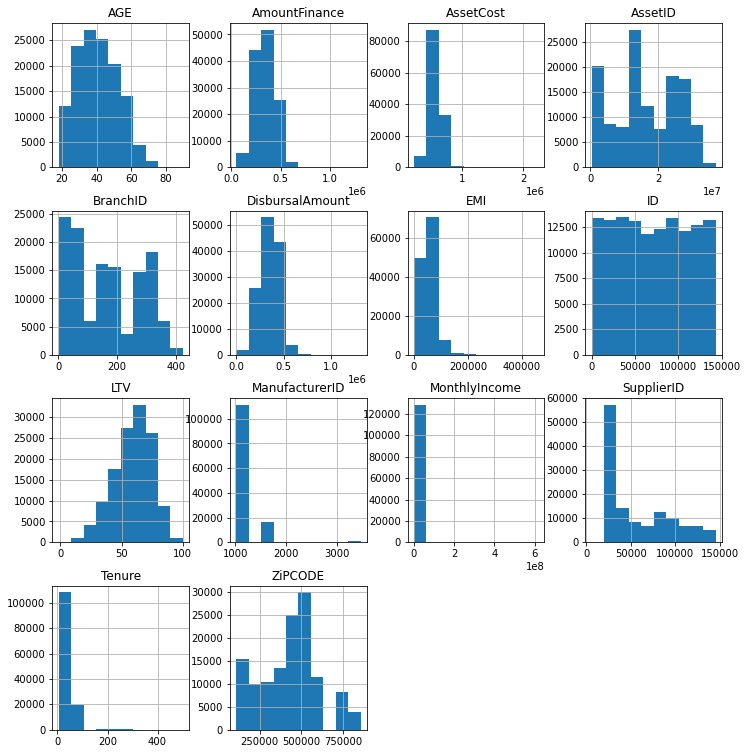

In [62]:
train_df.hist(figsize=(12,13))

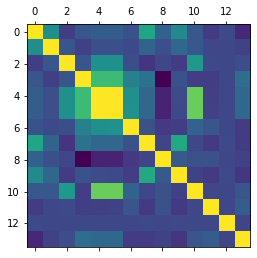

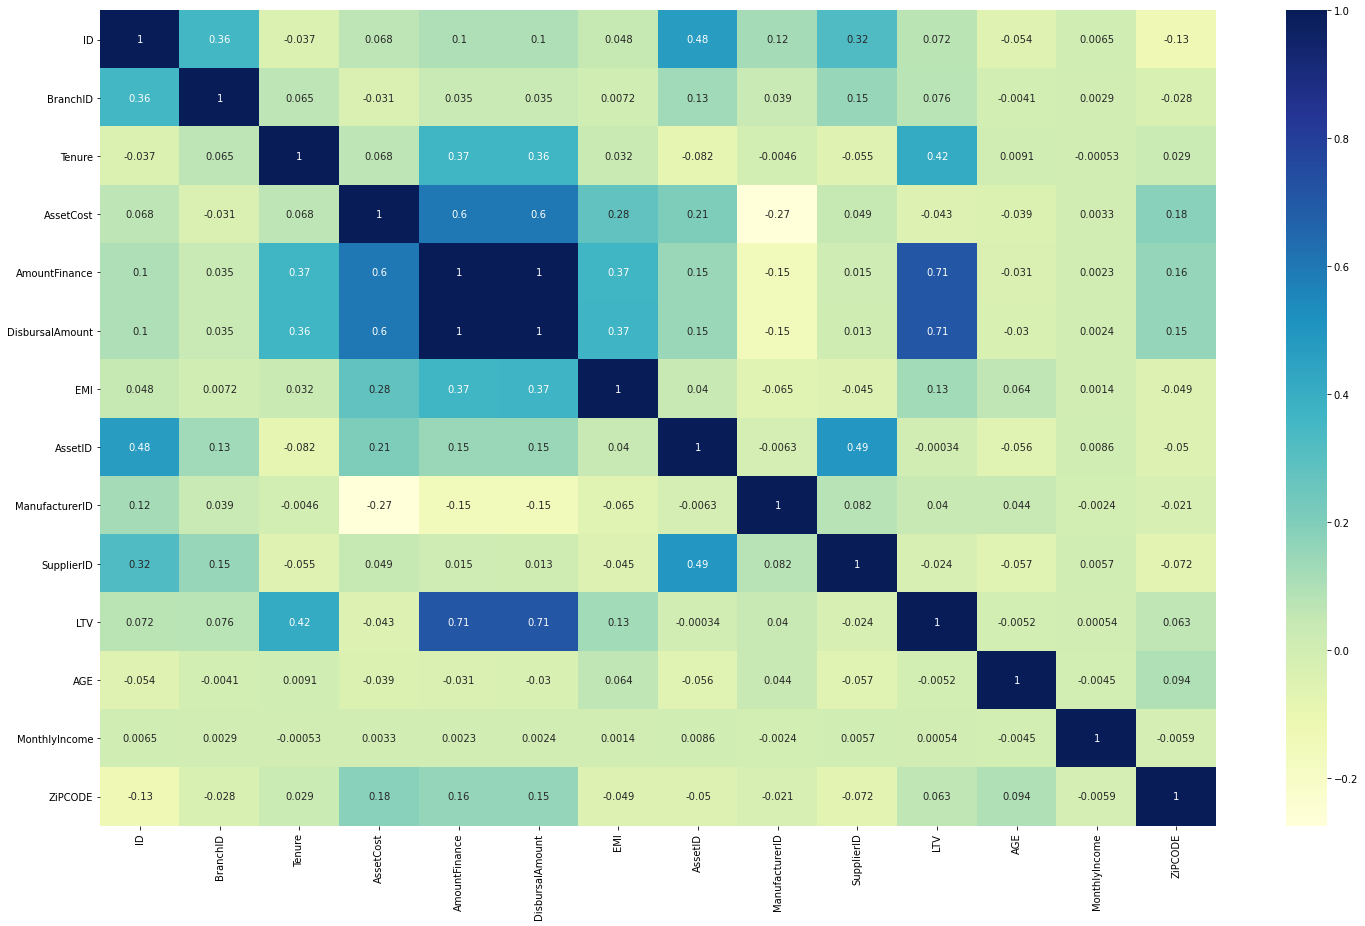

In [18]:
plt.matshow(train_df.corr())
plt.show()
plt.figure(figsize=(25,15)) 
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

In [ ]:
# Plot the first 2 columns
# plt.figure()
cols_to_plot = train_df.loc[:,['AmountFinance','DisbursalAmount']]
# sns.pairplot(cols_to_plot)
# plt.show()
# sns.heatmap(cols_to_plot.corr())
sns.relplot(x="DisbursalAmount", y="EMI", data=train_df)


In [ ]:
##############LABEL ENCODING###########################
# train_df['Top-up Month']=train_df['Top-up Month'].astype('category')
# train_df['Top-up Month']=train_df['Top-up Month'].cat.codes

# label_enc=LabelEncoder()
# train_df['Top-up Month']
# label_enc.fit(train_df['Top-up Month'])
# print(list(label_enc.classes_))
# train_df['Top-up Month']=label_enc.fit_transform(train_df['Top-up Month'])
def label_encode_function(df):
    label_enc=LabelEncoder()
    label_enc.fit(df)
    df=label_enc.fit_transform(df)
    return df
# label_encode_function(train_df['Top-up Month'])
# label_encode_function(train_df['SEX'].astype(str))



###########################Further used methods###########################

# train_df.drop(columns='City')
# len(train_df['Top-up Month'].unique())
# train_df['LTV']
# train_df['DisbursalDate'].dt.year
# train_df['Top-up Month'].unique()

In [27]:
bureau_df=pd.read_excel('./data/Test_data/test_bureau.xlsx')

In [28]:
bureau_df.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,...,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,4,False,PRIMARY,Credit Card,CCC,2019-11-17,Individual,Active,2019-09-26,NaN,...,NaN,0,0.0,NaN,"20191117,",000,"589,","0,","0,",NaN
1,4,False,PRIMARY,Housing Loan,HFC,2019-10-31,Joint,Active,2017-06-21,NaN,...,F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"2107227,2122196,2136877,2151448,2165910,218026...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
2,4,False,PRIMARY,Property Loan,HFC,2019-10-31,Joint,Active,2017-06-27,NaN,...,F03,0,0.0,NaN,"20191031,20190930,20190831,20190731,20190630,2...",0000000000000000000000000000000000000000000000...,"83458,84051,84632,85209,85781,86349,86913,8747...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,",120.0
3,4,True,PRIMARY,Tractor Loan,NBF,2015-10-31,Individual,Closed,2011-12-29,2015-10-13 00:00:00,...,NaN,0,0.0,NaN,"20151031,20150901,20150831,20150731,20150630,2...",000DDD0270000000000000000000000000000000000000...,"0,,21548,32097,42500,52758,62874,72850,82688,9...","0,,11000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,5,False,PRIMARY,Gold Loan,PRB,2017-08-31,Individual,Closed,2016-05-04,2017-06-15 00:00:00,...,NaN,0,0.0,NaN,"20170630,20170501,20170401,20170331,20170201,2...",000DDDDDD000DDDDDD000DDDDDD000DDDDDD000,"0,,,25846,,,25846,,,25846,,,25846,","0,,,0,,,0,,,0,,,0",",,,,,,,,,,,,,,",NaN


In [101]:
bureau_df.isna().sum()

ID                               0
SELF-INDICATOR                   0
MATCH-TYPE                       0
ACCT-TYPE                        0
CONTRIBUTOR-TYPE                 0
DATE-REPORTED                    0
OWNERSHIP-IND                    0
ACCOUNT-STATUS                   0
DISBURSED-DT                    44
CLOSE-DT                     31453
LAST-PAYMENT-DATE            32550
CREDIT-LIMIT/SANC AMT        62421
DISBURSED-AMT/HIGH CREDIT       38
INSTALLMENT-AMT              47693
CURRENT-BAL                     32
INSTALLMENT-FREQUENCY        48243
OVERDUE-AMT                  13127
WRITE-OFF-AMT                 2561
ASSET_CLASS                  34902
REPORTED DATE - HIST          2561
DPD - HIST                    2565
CUR BAL - HIST                2561
AMT OVERDUE - HIST            2561
AMT PAID - HIST               2672
TENURE                       42882
dtype: int64

In [132]:
cur_bal=bureau_df['CUR BAL - HIST'].str.split(',')
cur_bal

0                                                  [589, ]
1        [2107227, 2122196, 2136877, 2151448, 2165910, ...
2        [83458, 84051, 84632, 85209, 85781, 86349, 869...
3        [0, , 21548, 32097, 42500, 52758, 62874, 72850...
4        [0, , , 25846, , , 25846, , , 25846, , , 25846, ]
                               ...                        
64014    [204173, 243754, 282926, 321694, 360063, 39803...
64015    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100494, 2000...
64016    [179276, 214030, 248425, 282466, 316155, 34949...
64017    [0, 0, 0, 27840, 55324, 82457, 109244, 135689,...
64018    [0, 15073, 30001, 44784, 59424, 73923, 88281, ...
Name: CUR BAL - HIST, Length: 64019, dtype: object

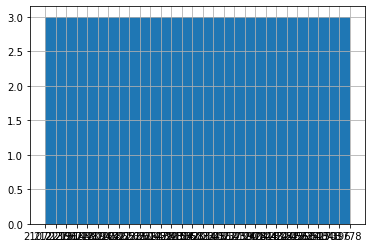

In [140]:

from pandas import Series
.apply(Series).stack().hist()

In [13]:
# bureau_df[bureau_df['TENURE']!=0]